In [1]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-media-addiction-vs-relationships/Students Social Media Addiction.csv


In [3]:
df = pd.read_csv("/kaggle/input/social-media-addiction-vs-relationships/Students Social Media Addiction.csv")
print(df.head())

   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score Relationship_Status  Conflicts_Over_Soc

In [4]:
df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


In [5]:
# calculating average social media usage by academic level
avg_usage_by_level = df.groupby('Academic_Level')['Avg_Daily_Usage_Hours'].mean().round(2).reset_index()
avg_usage_by_level

,Academic_Level,Avg_Daily_Usage_Hours
0,Graduate,4.78
1,High School,5.54
2,Undergraduate,5.00


In [6]:
# sorting by average daily usage hours
sorted_ = avg_usage_by_level.sort_values(by = 'Avg_Daily_Usage_Hours', ascending = False)
sorted_

,Academic_Level,Avg_Daily_Usage_Hours
1,High School,5.54
2,Undergraduate,5.00
0,Graduate,4.78


In [7]:
# most used social media platform
most_used = df['Most_Used_Platform'].value_counts().head(1)
most_used

Most_Used_Platform
Instagram    249
Name: count, dtype: int64

In [8]:
# average Sleep_Hours_Per_Night for students who use TikTok & Facebook
filtered_df = df[df['Most_Used_Platform'].isin(['TikTok', 'Facebook'])]
filtered_df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
8,9,18,Male,High School,Japan,4.0,TikTok,No,6.5,7,Single,1,5
11,12,20,Female,Undergraduate,Spain,5.5,TikTok,Yes,5.8,6,In Relationship,2,8
15,16,20,Female,Undergraduate,China,4.2,TikTok,Yes,6.0,6,Complicated,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,694,22,Male,Graduate,Switzerland,4.5,Facebook,No,7.3,7,In Relationship,2,5
696,697,21,Female,Undergraduate,Mexico,6.3,TikTok,Yes,6.2,5,Single,4,8
697,698,24,Male,Graduate,France,4.8,Facebook,No,7.1,7,In Relationship,2,5
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5


In [9]:
# calculating average sleep hours for students
average_sleep_hours = filtered_df.groupby('Most_Used_Platform')['Sleep_Hours_Per_Night'].mean().round(3).reset_index()
average_sleep_hours

,Most_Used_Platform,Sleep_Hours_Per_Night
0,Facebook,7.360
1,TikTok,6.363


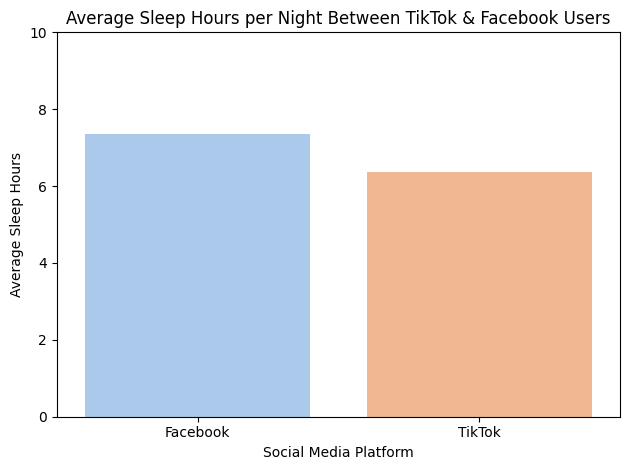

In [10]:
# Bar plot
sns.barplot(data = average_sleep_hours, x = 'Most_Used_Platform', y = 'Sleep_Hours_Per_Night', palette = 'pastel')
plt.title('Average Sleep Hours per Night Between TikTok & Facebook Users')
plt.ylabel('Average Sleep Hours')
plt.xlabel('Social Media Platform')
plt.ylim(0, 10)  # Adjust for readability
plt.tight_layout()
plt.show()

In [11]:
# calculating mental health distribution scores by age groups
# create age bins
b = [17, 19, 21, 23, 25] 
l = ['18-19', '20-21', '22-23', '24-25']
df['Age_Group'] = pd.cut(df['Age'], bins = b, labels = l)

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


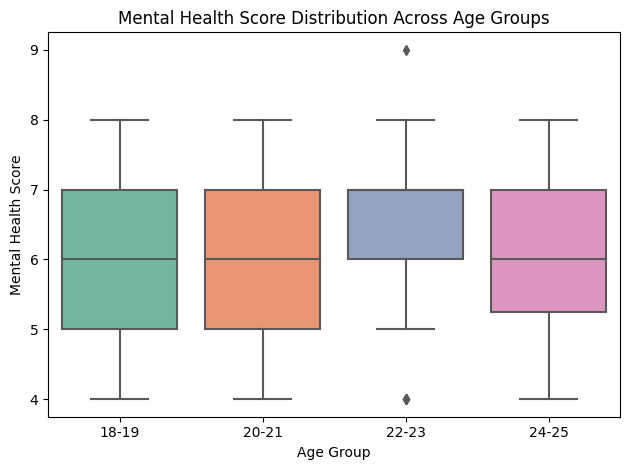

In [12]:
# disribution by age group
sns.boxplot(data = df, x = 'Age_Group', y = 'Mental_Health_Score', palette = 'Set2')
plt.title('Mental Health Score Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Mental Health Score')
plt.tight_layout()
plt.show()

In [13]:
agegroup_by_mentalhealth = df.groupby('Age_Group')['Mental_Health_Score'].mean().round(2).reset_index()
agegroup_by_mentalhealth

/tmp/ipykernel_35/1223058548.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agegroup_by_mentalhealth = df.groupby('Age_Group')['Mental_Health_Score'].mean().round(2).reset_index()


,Age_Group,Mental_Health_Score
0,18-19,5.99
1,20-21,6.19
2,22-23,6.51
3,24-25,6.35


In [14]:
df['Addicted_Score'].unique()

array([8, 3, 9, 4, 7, 2, 5, 6])

In [15]:
# Define addiction threshold
addiction_threshold = 7

# Filter students with Addicted_Score above threshold
addicted_students = df[df['Addicted_Score'] > addiction_threshold]
# Count them
num_addicted = len(addicted_students)
print(f"Number of students with Addicted_Score > {addiction_threshold}: {num_addicted}")

Number of students with Addicted_Score > 7: 199


In [16]:
# Finding the correlation between social media usage and Mental_Health_Score or Sleep_Hours_Per_Night?
corr = df[['Avg_Daily_Usage_Hours', 'Mental_Health_Score', 'Sleep_Hours_Per_Night']].corr()
corr

,Avg_Daily_Usage_Hours,Mental_Health_Score,Sleep_Hours_Per_Night
Avg_Daily_Usage_Hours,1.000000,-0.801058,-0.790582
Mental_Health_Score,-0.801058,1.000000,0.707439
Sleep_Hours_Per_Night,-0.790582,0.707439,1.000000


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


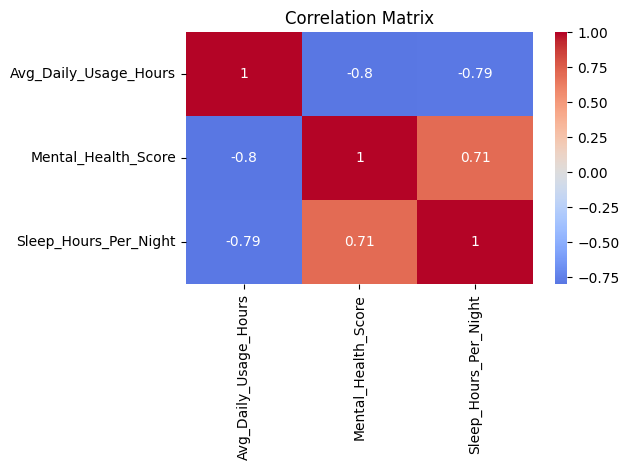

In [17]:
# visualization
sns.heatmap(corr, annot = True, cmap = 'coolwarm', center = 0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [18]:
# Do students who report that social media affects their academic performance use it more?
usage_comparison = df.groupby('Affects_Academic_Performance')['Avg_Daily_Usage_Hours'].mean().round(2).reset_index()
usage_comparison

,Affects_Academic_Performance,Avg_Daily_Usage_Hours
0,No,3.80
1,Yes,5.54


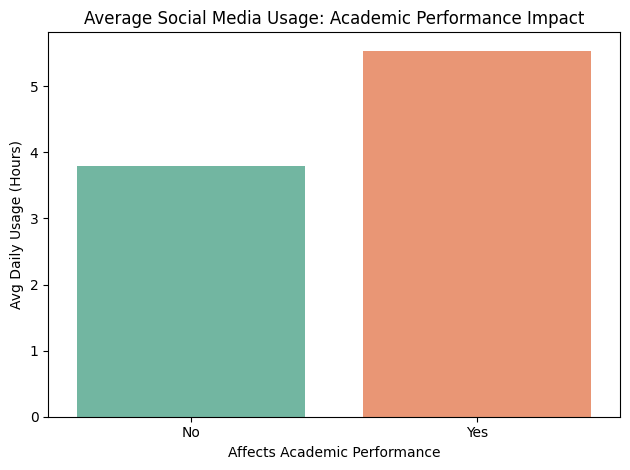

In [19]:
sns.barplot(data = usage_comparison,
            x = 'Affects_Academic_Performance',
            y = 'Avg_Daily_Usage_Hours',
            palette = 'Set2')

plt.title('Average Social Media Usage: Academic Performance Impact')
plt.xlabel('Affects Academic Performance')
plt.ylabel('Avg Daily Usage (Hours)')
plt.tight_layout()
plt.show()

In [20]:
# statistically checking for significant difference using a t-test
from scipy.stats import ttest_ind

yes_group = df[df['Affects_Academic_Performance'] == 'Yes']['Avg_Daily_Usage_Hours']
no_group = df[df['Affects_Academic_Performance'] == 'No']['Avg_Daily_Usage_Hours']

t_stat, p_value = ttest_ind(yes_group, no_group)

print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.2f}")

T-statistic: 23.39, P-value: 0.00


In [21]:
# Addicted score between genders
addiction_by_gender = df.groupby('Gender')['Addicted_Score'].mean().round(2).reset_index()
addiction_by_gender

,Gender,Addicted_Score
0,Female,6.52
1,Male,6.36


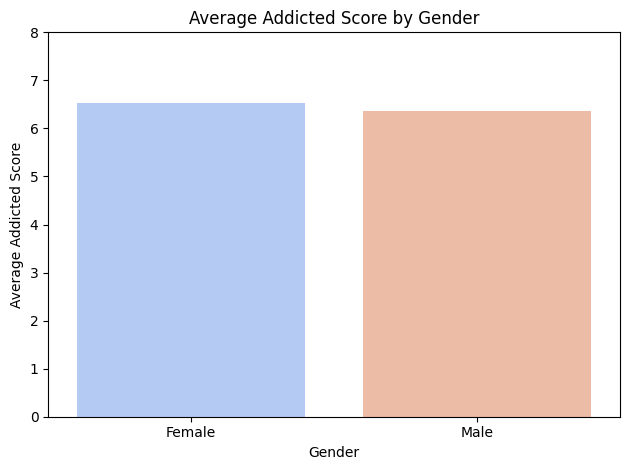

In [22]:
# visual
sns.barplot(data = addiction_by_gender, x = 'Gender', y = 'Addicted_Score', palette = 'coolwarm')
plt.title('Average Addicted Score by Gender')
plt.ylabel('Average Addicted Score')
plt.ylim(0, 8)
plt.tight_layout()
plt.show()

In [23]:
# statistically checking for significant difference using a t-test 
# (If p < 0.05: the difference is statistically significant 
# If p ≥ 0.05: the difference is not statistically significant.)

male_scores = df[df['Gender'] == 'Male']['Addicted_Score']
female_scores = df[df['Gender'] == 'Female']['Addicted_Score']

t_stat, p_value = ttest_ind(male_scores, female_scores)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

T-statistic: -1.319, P-value: 0.188


In [24]:
# Which platform users report the highest average Addicted_Score
avg_addiction_by_platform = df.groupby('Most_Used_Platform')['Addicted_Score'].mean().round(2).reset_index().sort_values(by = 'Addicted_Score', ascending = False)
avg_addiction_by_platform

,Most_Used_Platform,Addicted_Score
5,Snapchat,7.46
10,WhatsApp,7.46
6,TikTok,7.43
1,Instagram,6.55
11,YouTube,6.10
9,WeChat,6.07
2,KakaoTalk,6.00
0,Facebook,5.67
7,Twitter,5.50
8,VKontakte,5.00


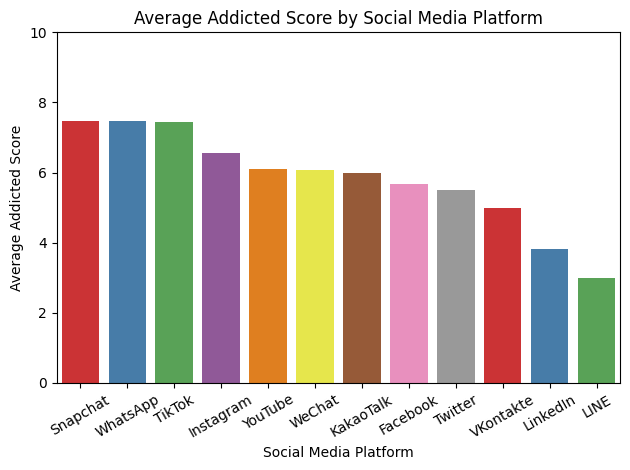

In [25]:
sns.barplot(data = avg_addiction_by_platform,
            x = 'Most_Used_Platform',
            y = 'Addicted_Score',
            palette = 'Set1')

plt.title('Average Addicted Score by Social Media Platform')
plt.xlabel('Social Media Platform')
plt.ylabel('Average Addicted Score')
plt.ylim(0, 10)
plt.xticks(rotation = 30)
plt.tight_layout()
plt.show()

In [26]:
# Can Avg_Daily_Usage_Hours, Sleep_Hours_Per_Night, and Addicted_Score predict whether a student reports academic impact?
# using logistic regression

# encoding the target variable, converting yes and no to 1 & 0 respectively
df['Impact_Label'] = df['Affects_Academic_Performance'].map({'Yes' : 1, 'No' : 0})
df['Impact_Label']

0      1
1      0
2      1
3      0
4      1
      ..
700    0
701    1
702    1
703    0
704    1
Name: Impact_Label, Length: 705, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
# feature
X = df[['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Addicted_Score']]
y = df['Impact_Label']

# splitting into training and testing models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [28]:
from sklearn.linear_model import LogisticRegression
# fitting the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# evaluating the model
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9764150943396226
Confusion Matrix:
 [[ 72   5]
 [  0 135]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        77
           1       0.96      1.00      0.98       135

    accuracy                           0.98       212
   macro avg       0.98      0.97      0.97       212
weighted avg       0.98      0.98      0.98       212



In [30]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print(coefficients)

                 Feature  Coefficient
0  Avg_Daily_Usage_Hours     0.097956
1  Sleep_Hours_Per_Night     0.258630
2         Addicted_Score     4.251578


In [31]:
import statsmodels.formula.api as smf

# Create a regression model with interaction
model = smf.ols('Mental_Health_Score ~ Age + Avg_Daily_Usage_Hours + Age:Avg_Daily_Usage_Hours', data = df)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     Mental_Health_Score   R-squared:                       0.647
Model:                             OLS   Adj. R-squared:                  0.645
Method:                  Least Squares   F-statistic:                     427.5
Date:                 Tue, 08 Jul 2025   Prob (F-statistic):          8.08e-158
Time:                         09:27:07   Log-Likelihood:                -703.64
No. Observations:                  705   AIC:                             1415.
Df Residuals:                      701   BIC:                             1434.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept   

In [32]:
from scipy.stats import f_oneway

# Get Addicted_Score for each country
groups = [group['Addicted_Score'].values for _, group in df.groupby('Country')]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)

print(f"F-statistic: {f_stat:.3f}, P-value: {p_value:.3f}")

F-statistic: 13.595, P-value: 0.000


In [33]:
# distribution of Mental_Health_Score across age groups or countries
# Mapping countries into continents for better visuals
continent_map = {
    # Asia
    'Afghanistan': 'Asia', 'Armenia': 'Asia', 'Azerbaijan': 'Asia', 'Bahrain': 'Asia',
    'Bangladesh': 'Asia', 'Bhutan': 'Asia', 'China': 'Asia', 'Cyprus': 'Asia',
    'Georgia': 'Asia', 'India': 'Asia', 'Indonesia': 'Asia', 'Iraq': 'Asia',
    'Israel': 'Asia', 'Japan': 'Asia', 'Jordan': 'Asia', 'Kazakhstan': 'Asia',
    'Kuwait': 'Asia', 'Kyrgyzstan': 'Asia', 'Lebanon': 'Asia', 'Malaysia': 'Asia',
    'Maldives': 'Asia', 'Mongolia': 'Asia', 'Nepal': 'Asia', 'Oman': 'Asia',
    'Pakistan': 'Asia', 'Philippines': 'Asia', 'Qatar': 'Asia', 'Saudi Arabia': 'Asia',
    'Singapore': 'Asia', 'South Korea': 'Asia', 'Sri Lanka': 'Asia', 'Syria': 'Asia',
    'Taiwan': 'Asia', 'Tajikistan': 'Asia', 'Thailand': 'Asia', 'Turkey': 'Asia',
    'UAE': 'Asia', 'Uzbekistan': 'Asia', 'Vietnam': 'Asia', 'Yemen': 'Asia',

    # Europe
    'Albania': 'Europe', 'Andorra': 'Europe', 'Austria': 'Europe', 'Belarus': 'Europe',
    'Belgium': 'Europe', 'Bosnia': 'Europe', 'Bulgaria': 'Europe', 'Croatia': 'Europe',
    'Czech Republic': 'Europe', 'Denmark': 'Europe', 'Estonia': 'Europe', 'Finland': 'Europe',
    'France': 'Europe', 'Germany': 'Europe', 'Greece': 'Europe', 'Hungary': 'Europe',
    'Iceland': 'Europe', 'Ireland': 'Europe', 'Italy': 'Europe', 'Kosovo': 'Europe',
    'Latvia': 'Europe', 'Liechtenstein': 'Europe', 'Lithuania': 'Europe', 'Luxembourg': 'Europe',
    'Malta': 'Europe', 'Moldova': 'Europe', 'Monaco': 'Europe', 'Montenegro': 'Europe',
    'Netherlands': 'Europe', 'North Macedonia': 'Europe', 'Norway': 'Europe', 'Poland': 'Europe',
    'Portugal': 'Europe', 'Romania': 'Europe', 'San Marino': 'Europe', 'Serbia': 'Europe',
    'Slovakia': 'Europe', 'Slovenia': 'Europe', 'Spain': 'Europe', 'Sweden': 'Europe',
    'Switzerland': 'Europe', 'Ukraine': 'Europe', 'UK': 'Europe', 'Vatican City': 'Europe',

    # North America
    'Bahamas': 'North America', 'Canada': 'North America', 'Costa Rica': 'North America',
    'Jamaica': 'North America', 'Mexico': 'North America', 'Panama': 'North America',
    'Trinidad': 'North America', 'USA': 'North America',

    # South America
    'Argentina': 'South America', 'Bolivia': 'South America', 'Brazil': 'South America',
    'Chile': 'South America', 'Colombia': 'South America', 'Ecuador': 'South America',
    'Paraguay': 'South America', 'Peru': 'South America', 'Uruguay': 'South America',
    'Venezuela': 'South America',

    # Africa
    'Egypt': 'Africa', 'Ghana': 'Africa', 'Kenya': 'Africa', 'Morocco': 'Africa',
    'Nigeria': 'Africa', 'South Africa': 'Africa',

    # Oceania
    'Australia': 'Oceania', 'New Zealand': 'Oceania'
}

In [34]:
# creating the continent column 
df['Continent'] = df['Country'].map(continent_map)

In [35]:
# Top average addicted score by continent
avg_addiction_by_region = df.groupby('Continent')['Addicted_Score'].mean().round(2).reset_index()
avg_addiction_by_region

,Continent,Addicted_Score
0,Africa,6.17
1,Asia,6.67
2,Europe,5.78
3,North America,7.58
4,Oceania,5.50
5,South America,6.76


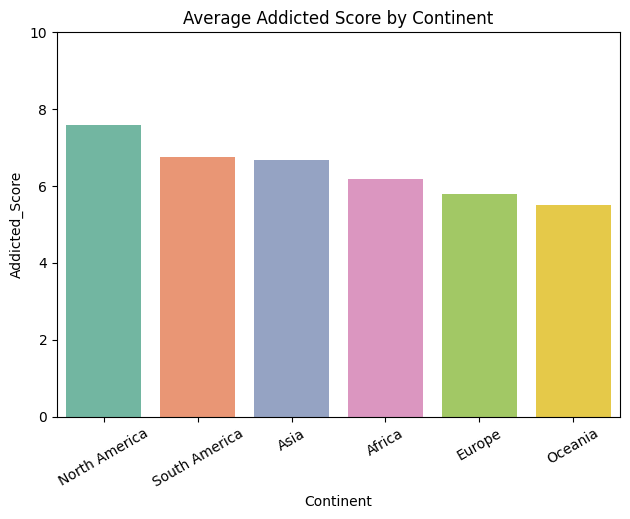

In [36]:
# plotting
sns.barplot(data = avg_addiction_by_region.sort_values(by = 'Addicted_Score', ascending = False), x = 'Continent', y = 'Addicted_Score', palette = 'Set2')
plt.title("Average Addicted Score by Continent")
plt.ylim(0, 10)
plt.tight_layout()
plt.xticks(rotation = 30)
plt.show()

In [37]:
df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Age_Group,Impact_Label,Continent
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,18-19,1,Asia
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3,22-23,0,Asia
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9,20-21,1,North America
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4,18-19,0,Europe
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,20-21,1,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5,20-21,0,Europe
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9,22-23,1,NaN
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7,20-21,1,Asia
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4,24-25,0,Asia


In [38]:
filtered_df = df[df['Relationship_Status'].isin(['In Relationship', 'Single'])]
filtered_df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Age_Group,Impact_Label,Continent
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,18-19,1,Asia
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3,22-23,0,Asia
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4,18-19,0,Europe
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,20-21,1,North America
6,7,23,Male,Graduate,Germany,1.5,LinkedIn,No,8.0,9,Single,0,2,22-23,0,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5,20-21,0,Europe
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9,22-23,1,NaN
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7,20-21,1,Asia
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4,24-25,0,Asia


In [39]:
filtered_df.groupby('Relationship_Status')['Conflicts_Over_Social_Media'].mean()

Relationship_Status
In Relationship    2.761246
Single             2.901042
Name: Conflicts_Over_Social_Media, dtype: float64